In [1]:
import numpy as np

In [2]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels

In [3]:
from labtools import plot_style, USER, LOC

In [94]:
from scipy.signal import find_peaks

In [4]:
import os

In [5]:
dump_name = "/home/bbuusshh/Desktop/git_lab/data/fibers/normal_tale_0.dump"
# dump_name = "rabi____aaaaaa_0.dump"
# dump_name="scan_2.dump"
dump = dump_name
data = get_dump(dump)

In [6]:
trig = get_trig_len(data, trig_ch=5)

In [7]:
trig

180013.16288016204

In [103]:
pic_folder = "/home/bbuusshh/Desktop/git_lab/data/fibers/tail_norm_figures_2/hist_1.csv"
ram = "/home/bbuusshh/Desktop/git_lab/data/fibers/no_molecule_0_figures_2/hist_1.csv"

In [130]:
data = np.genfromtxt(pic_folder)
r_data = np.genfromtxt(ram)

In [131]:
from matplotlib import pyplot as plt

In [132]:
p = plot_style.plotting()

In [133]:
t = np.linspace(0, trig/1000, len(data))         

In [134]:
def exp(t, A, B, T):
    return A * np.exp(-t/T) + B

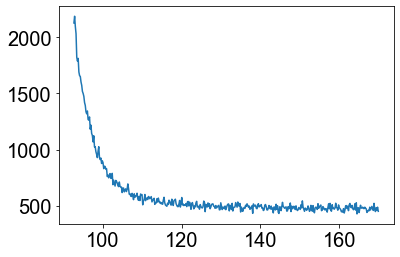

In [135]:
plt.plot(t[(t>92.45) & (t<170)], data[(t>92.45) & (t<170)])

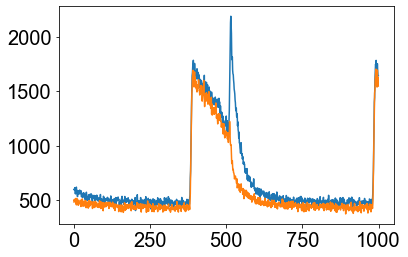

In [138]:
plt.plot(data)
plt.plot(r_data)

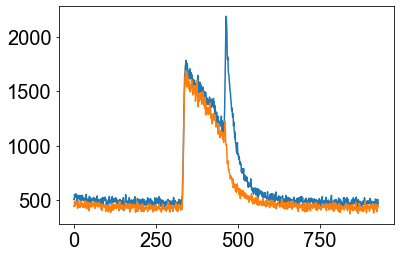

In [139]:
plt.plot(data[50:-20])
plt.plot(r_data[50:-20])

In [140]:
data = data[50:-20]
r_data = r_data[50:-20]
t = t[50:-20]

In [141]:
peaks, _ = find_peaks((data-min(data))/np.max(data), height=0.8, distance=len(data)*0.9)

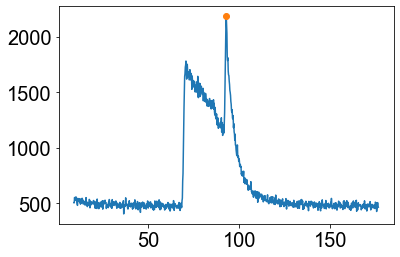

In [142]:
plt.plot(t, data)
plt.plot(t[peaks], data[peaks], 'o')

In [145]:
t = t - t[peaks[0]]

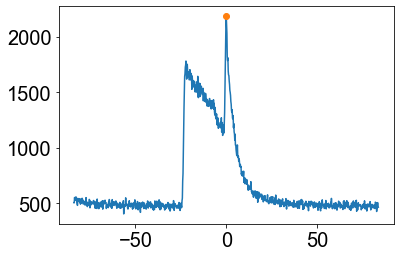

In [146]:
plt.plot(t, data)
plt.plot(t[peaks], data[peaks], 'o')

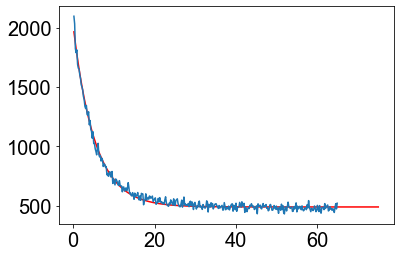

In [186]:
popta, pcov = optimize.curve_fit(exp,t[(t>-.5)*(t<75)], data[(t>-0.5)*(t<75)], p0=[20,2000, 5])#, bounds=bounds)

plt.plot(t[(t>0)*(t<75)], exp(t[(t>0)*(t<75)], *popta), 'r')
plt.plot(t[(t>0)*(t<65)], data[(t>0)*(t<65)])

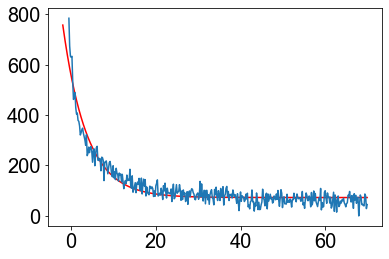

In [236]:
popta_r, pcov_r = optimize.curve_fit(exp,t[(t>-0.6)*(t<70)], r_data[(t>-0.6)*(t<70)] -min(r_data), p0=[20,200, 20])#, bounds=bounds)

plt.plot(t[(t>-2)*(t<70)], exp(t[(t>-2)*(t<70)], *popta_r), 'r')
plt.plot(t[(t>-0.6)*(t<70)], r_data[(t>-0.6)*(t<70)] - min(r_data))

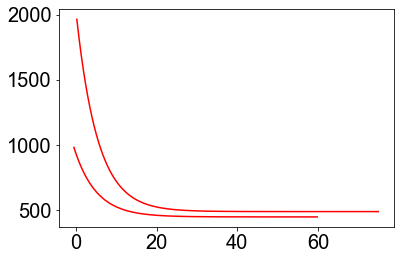

In [221]:
plt.plot(t[(t>0)*(t<75)], exp(t[(t>0)*(t<75)], *popta), 'r')
plt.plot(t[(t>-0.6)*(t<60)], exp(t[(t>-0.6)*(t<60)], *popta_r), 'r')

In [219]:
popta_r

array([482.04368001, 449.71511926,   5.44492033])

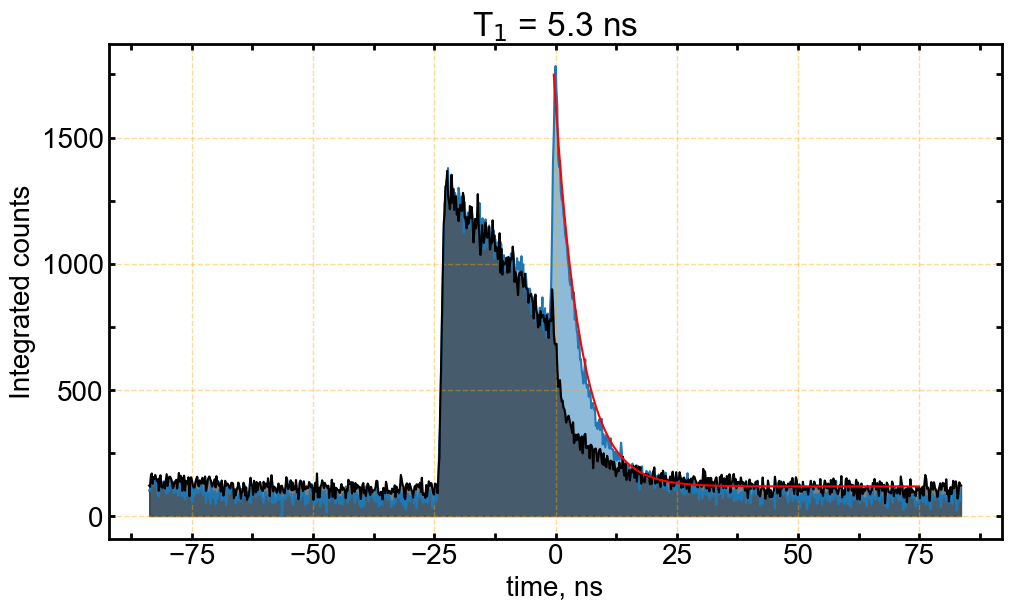

In [242]:
p.plot(t, data - min(data), xLabel='time, ns', yLabel='Integrated counts', line='-', fill=0.5, tick_step_y=500, tick_step_x=25, ticks_in_between=1)
plt.plot(t, r_data + 50 - min(r_data), 'k')
plt.fill_between(t, r_data - min(r_data) + 50, color='black', alpha=0.5)
plt.plot(t[(t>-0.5)*(t<75)], exp(t[(t>-0.5)*(t<75)], *popta) - min(r_data), 'r')
#plt.plot(t[(t>-2)*(t<70)], exp(t[(t>-2)*(t<70)], *popta_r) + 50, 'r')
plt.title(f"T$_1$ = {np.round(popta[-1],1)} ns")
plt.savefig("paper_plot_filled_20.svg")
#p.save("paper_plot_filled_2",extension='svg')

In [19]:
popta

array([9.00982070e+10, 4.90699015e+02, 5.19090712e+00])

In [20]:
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])

In [21]:
perr

array([1.65039522e+10, 1.61212455e+00, 5.20902529e-02])

In [22]:
from scipy import constants as cc

In [23]:
cc.speed_of_light * 22*1e-9/1.5

4.396956050666667